In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

# setups
sns.set_style('white')
sns.set_context('talk')
np.random.seed(123)

In [5]:
# generate data points
data = np.random.randn(20)

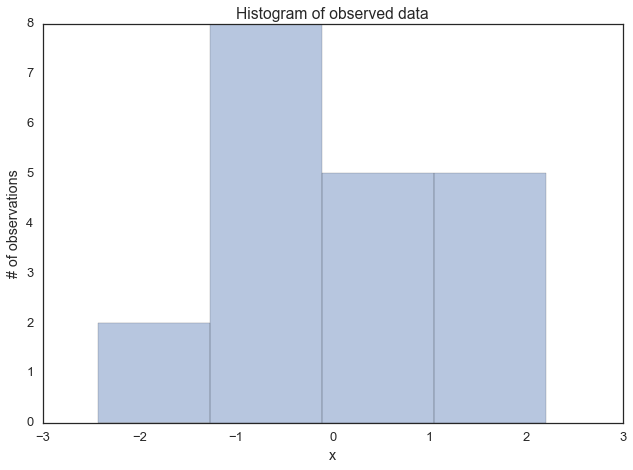

In [12]:
# plot generated data
sns.distplot(data, kde=False)
plt.title('Histogram of observed data')
plt.xlabel('x')
plt.ylabel('# of observations')
plt.show()

In [7]:
# calculate analytical gradient
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

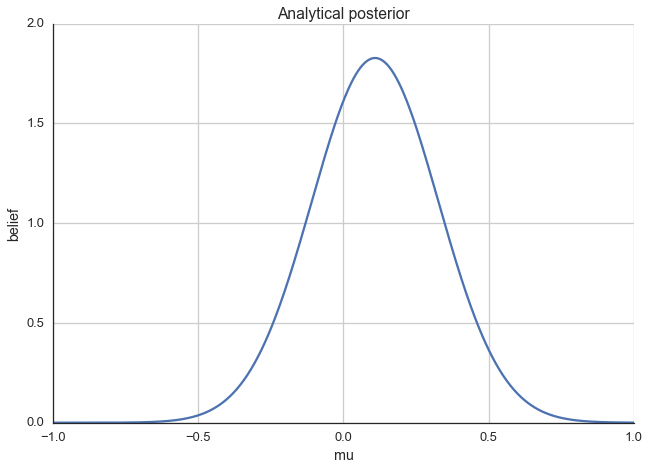

In [24]:
# plot analytical posterior on mu
x = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
plt.plot(x, posterior_analytical)
plt.grid()
plt.title('Analytical posterior')
plt.xlabel('mu')
plt.ylabel('belief')
sns.despine()
plt.show()

In [42]:
# mcmc sample
def sampler(data, samples=10, burn_in=500, mu_init=.5, proposal_width=.5, prior_mu=0., prior_sd=1.):
    mu_current = mu_init
    posterior = []
    
    for s_ix in xrange(samples + burn_in):
        mu_proposal = norm(mu_current, proposal_width).rvs()
        
        # compute current posterior
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        prior_current = norm(prior_mu, prior_sd).pdf(mu_current)
        prob_current = likelihood_current * prior_current
        
        # computer proposal posterior
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        prior_proposal = norm(prior_mu, prior_sd).pdf(mu_proposal)
        prob_proposal = likelihood_proposal * prior_proposal
        
        # acceptance ratio
        prob_accept = prob_proposal / prob_current
        accept = np.random.rand() < prob_accept
        
        if accept:
            mu_current = mu_proposal
            
        if s_ix >= burn_in:
            posterior.append(mu_current)
    
    return np.array(posterior)

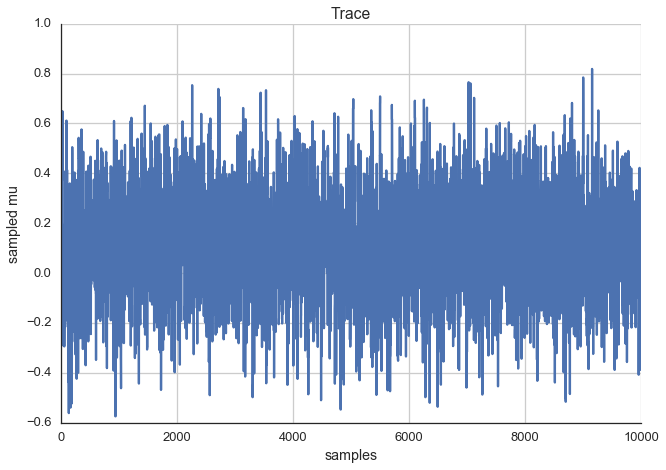

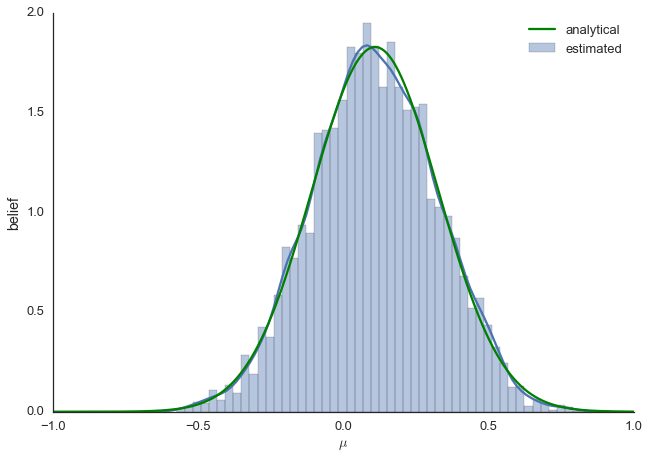

In [43]:
# plot trace
num_samples = 10000
x = range(num_samples)
posterior_sampled = sampler(data, samples=num_samples)
plt.plot(x, posterior_sampled)
plt.grid()
plt.title('Trace')
plt.xlabel('samples')
plt.ylabel('sampled mu')
sns.despine()
plt.show()

# plot posterior
x = np.linspace(-1, 1, 500)
sns.distplot(posterior_sampled, label='estimated')
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
plt.plot(x, posterior_analytical, 'g', label='analytical')
sns.despine()
plt.xlabel('$\mu$')
plt.ylabel('belief')
plt.legend()
plt.show()